In [76]:
import pandas as pd

df = pd.read_csv('./altura-peso-edad.csv')
df.head()

,nombre,altura,peso,edad
0,Jose Rodriguez,1.79,89,34
1,Luis Menjivar,1.67,88,38
2,Carlos Castro,1.71,80,27
3,Ana Paz,1.86,79,31
4,Maria Fernandez,1.67,81,38


In [77]:
# Datos de Entrenamiento
DatosEnt = df[['altura', 'peso']]
DatosEnt


,altura,peso
0,1.79,89
1,1.67,88
2,1.71,80
3,1.86,79
4,1.67,81
5,1.85,76
6,1.78,76
7,1.76,74
8,1.76,68
9,1.81,62


<Axes: xlabel='altura', ylabel='peso'>

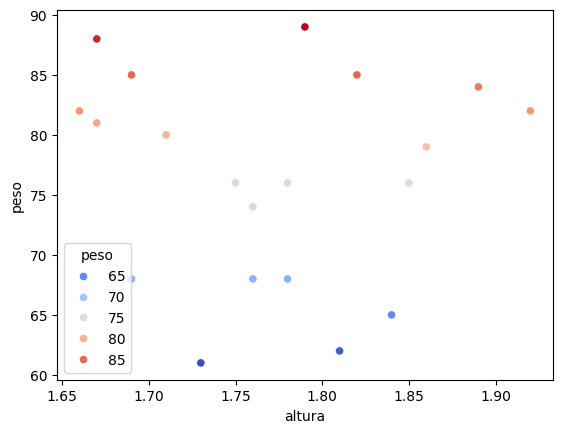

In [78]:
import seaborn as sb

sb.scatterplot(x='altura', y='peso', data=DatosEnt, hue='peso', palette='coolwarm')

In [79]:
from sklearn.linear_model import LinearRegression

# Procesamiento
X = DatosEnt['altura']
y = DatosEnt['peso']

X_train = X.values.reshape(-1, 1)
y_train = y.values.reshape(-1, 1)
modelo = LinearRegression()

# Entrenamiento
modelo.fit(X_train, y_train)

# Predicción
alturaNew = 1.69
pesoPred = modelo.predict([[alturaNew]])

pesoRedondeado = round(pesoPred[0][0], 2)

print(f"Para una persona de {alturaNew} metros de altura, se predice un peso de {pesoRedondeado} kg")
print("============================================================================================")

exactitud = modelo.score(X_train, y_train)
exactitud = round(exactitud * 100, 2)
print(f"Exactitud del modelo: {exactitud}%")

Para una persona de 1.69 metros de altura, se predice un peso de 76.86 kg
Exactitud del modelo: 0.2%


In [80]:
# ¿Funciona bien o no? ¿Por qué cree que es así?
# Respuesta: 
# No Funciona bien, creo que cuando damos datos reales dan 
# un grafica que no es lineal y por eso no se ajusta bien a la regresion lineal

In [81]:
# Agregando la edad 
DatosEnt_Edad = df[['altura', 'peso', 'edad']]

X = DatosEnt_Edad[['altura', 'edad']]
y = DatosEnt_Edad['peso']

X_train = X.values.reshape(-1, 2)
y_train = y.values.reshape(-1, 1)

modeloNew = LinearRegression()
modeloNew.fit(X_train, y_train)

LinearRegression()

In [82]:
# Nuevo registro
alturaNew2 = 1.69
edadNew = 25
pesoPred2 = modeloNew.predict([[alturaNew2, edadNew]])
pesoRedondeado2 = round(pesoPred2[0][0], 2)

print(f"Para una persona de {alturaNew2} metros de altura y {edadNew} años de edad, se predice un peso de {pesoRedondeado2} kg")
print("=====================================================================================================")

exactitud2 = modeloNew.score(X_train, y_train)
exactitud2 = round(exactitud * 100, 2)
print(f"La exactitud del modelo es: {exactitud}%")

Para una persona de 1.69 metros de altura y 25 años de edad, se predice un peso de 72.19 kg
La exactitud del modelo es: 0.2%


In [83]:
# Pregunta: ¿Funciona mejor el modelo? ¿Por qué cree que es así?
# Respuesta:
# Pues desde mi punto de vista creo que si mejoro mas,
# la exactitud era de 0.2% y ahora es de 12%,
# ahora da mas exacto porque se agrego la edad y 
# eso influye bastante en el peso de una persona ya que 
# generalmente las personas mayores suelen pesar mas 
# porque hacen menos ejercicio y su metabolismo es mas lento